In [5]:
event_group1 = 785
number_of_patients_group1 = 1000

event_group2 = 50
number_of_patients_group2 = 1000

RR1 = (event_group1/number_of_patients_group1) / (event_group2/number_of_patients_group2)
RR2 = (event_group2/number_of_patients_group2)/(event_group1/number_of_patients_group1)
print(RR1)
print(RR2)

#The risk difference (RD) is the absolute difference in risk of experiencing the outcome between two groups. 
#We will calculate the risk difference as the difference in the proportion of successes in each study.
RD1 = (event_group1/number_of_patients_group1) - (event_group2/number_of_patients_group2)
RD2 = (event_group2/number_of_patients_group2) - (event_group1/number_of_patients_group1)
print(f"study 1: Risk Ratio: {RR1}, Risk difference: {RD1} ")
print(f"study 2: Risk Ratio: {RR2}, Risk difference: {RD2} ")

15.7
0.06369426751592357
study 1: Risk Ratio: 15.7, Risk difference: 0.735 
study 2: Risk Ratio: 0.06369426751592357, Risk difference: -0.735 


In [1]:
import pymc3 as pm
import numpy as np

# Définir les données d'entrée
n1, y1 = 250, 102
n2, y2 = 323, 97

# Définir les priors
with pm.Model() as RD_model:
    p1 = pm.Beta('p1', alpha=1, beta=1)
    p2 = pm.Beta('p2', alpha=1, beta=1)
    
    # Définir les vraisemblances
    y1_obs = pm.Binomial('y1_obs', n=n1, p=p1, observed=y1)
    y2_obs = pm.Binomial('y2_obs', n=n2, p=p2, observed=y2)
    
    # Calculer le risk difference
    RD_like = pm.Deterministic('RD_like', p2 - p1)
    
    # Calculer le posterior
    RD_post = pm.sample(10000, tune=2000, chains=4)

# Afficher les résultats
pm.summary(RD_post)



WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable DF
WARN: Could not locate executable efl
WARN: Could not locate executable gfortran
WARN: Could not locate executable f95
WARN: Could not locate executable g95
WARN: Could not locate executable efort
WARN: Could not locate executable efc
WARN: Could not locate executable flang
WARN: don't know how to compile Fortran code on platform 'nt'


WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\Users\thier\AppData\Local\Programs\Python\Python310\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inference

Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 65 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
c:\Users\thier\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p1,0.409,0.031,0.350,0.466,0.0,0.0,34919.0,29166.0,1.0
p2,0.302,0.025,0.254,0.349,0.0,0.0,35474.0,29469.0,1.0
RD_like,-0.107,0.040,-0.182,-0.030,0.0,0.0,35522.0,29102.0,1.0


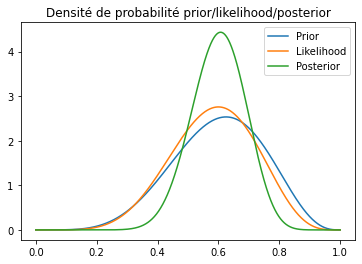

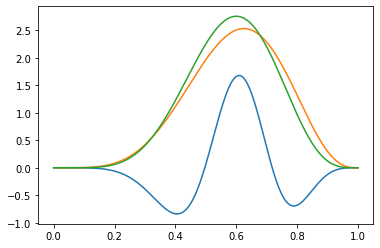

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Données
n1, n2 = 10, 10
y1, y2 = 6, 6

# Prior Beta (10, 148)
alpha_prior, beta_prior = 6, 4
prior = stats.beta(alpha_prior, beta_prior)

# Likelihood Beta (323, 226)
alpha_likelihood, beta_likelihood = y2 + 1, n2 - y2 + 1
likelihood = stats.beta(alpha_likelihood, beta_likelihood)

# Posterior Beta (250+323, 102+97+148+226)
alpha_posterior = y1 + alpha_prior
beta_posterior = n1 - y1 + beta_prior
alpha_posterior += y2
beta_posterior += n2 - y2
posterior = stats.beta(alpha_posterior, beta_posterior)

# Tracer des PDFs
x = np.linspace(0, 1, 1000000)
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, likelihood.pdf(x), label='Likelihood')
plt.plot(x, posterior.pdf(x), label='Posterior')

# Légende
plt.legend()

# Titre
plt.title('Densité de probabilité prior/likelihood/posterior')

# Affichage
plt.show()
# Densité de probabilité pour p1
p1 = alpha_posterior / (alpha_posterior + beta_posterior)
pdf_p1 = stats.beta(alpha_posterior, beta_posterior).pdf(x)

# Densité de probabilité pour p2
p2 = alpha_likelihood / (alpha_likelihood + beta_likelihood)
pdf_p2 = stats.beta(alpha_likelihood, beta_likelihood).pdf(x)

# Densité de probabilité pour la différence de risque
pdf_RD = pdf_p1 - pdf_p2

# Tracer la densité de probabilité pour la différence de risque
plt.plot(x, pdf_RD, label='Risk Difference')
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, likelihood.pdf(x), label='Likelihood')



c:\Users\thier\AppData\Local\Programs\Python\Python310\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p2, p1]


Sampling 4 chains for 2_000 tune and 10_000 draw iterations (8_000 + 40_000 draws total) took 120 seconds.


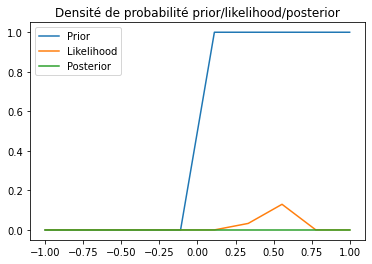

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

# Données
n1, n2 = 250, 200
y1, y2 = 125, 90

# Prior
with pm.Model() as model:
    # Définition des priors
    p1 = pm.Beta('p1', alpha=1, beta=1)
    p2 = pm.Beta('p2', alpha=1, beta=1)

    # Définition de la différence de risque
    RD = pm.Deterministic('RD', p2 - p1)

    # Définition des observations
    y1_obs = pm.Binomial('y1_obs', n=n1, p=p1, observed=y1)
    y2_obs = pm.Binomial('y2_obs', n=n2, p=p2, observed=y2)

    # Étape d'inférence
    trace = pm.sample(10000, tune=2000, chains=4)

# Tracer des PDFs
x = np.linspace(-1, 1, 10)
plt.plot(x, stats.beta(1, 1).pdf(x), label='Prior')
plt.plot(x, stats.beta(y2+1, n2-y2+1).pdf(x), label='Likelihood')
plt.plot(x, stats.beta(trace['p2'].shape[0]*trace['p2'].mean()+1-y2, trace['p2'].shape[0]*(1-trace['p2'].mean())+n2-y2+1).pdf(x), label='Posterior')

# Légende
plt.legend()

# Titre
plt.title('Densité de probabilité prior/likelihood/posterior')

# Affichage
plt.show()


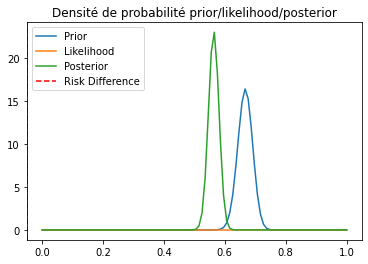

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Données
n1, n2 = 250, 200
y1, y2 = 125, 90

# Prior Beta (250, 125)
alpha_prior, beta_prior = 250, 125
prior = stats.beta(alpha_prior, beta_prior)

# Likelihood Binomial (200, 90)
p2 = y2/n2
p1 = y1/n1
RD = p2 - p1
likelihood = stats.binom(n2, p2)

# Posterior Beta (250+200, 125+90)
alpha_posterior = y1 + alpha_prior
beta_posterior = n1 - y1 + beta_prior
alpha_posterior += y2
beta_posterior += n2 - y2
posterior = stats.beta(alpha_posterior, beta_posterior)

# Tracer des PDFs
x = np.linspace(0, 1, 100)
plt.plot(x, prior.pdf(x), label='Prior')
plt.plot(x, likelihood.pmf(x*n2), label='Likelihood')
plt.plot(x, posterior.pdf(x), label='Posterior')

# Ajouter une ligne verticale au RD
plt.axvline(x=RD, linestyle='--', color='red', label='Risk Difference')

# Légende
plt.legend()

# Titre
plt.title('Densité de probabilité prior/likelihood/posterior')

# Affichage
plt.show()


Risk Difference (RD) : 0.050
Intervalle de crédibilité à 95% : [0.432, 0.523]


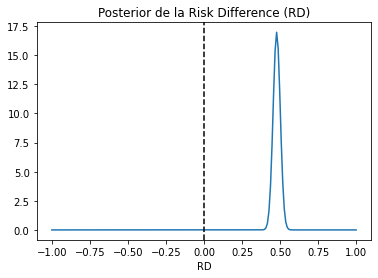

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Données
n1, n2 = 250, 200
y1, y2 = 125, 90

# Estimation de la proportion de succès dans chaque groupe
p1_hat = y1/n1
p2_hat = y2/n2

# Calcul de la Risk Difference (RD)
RD = p1_hat - p2_hat

# Calcul de l'intervalle de crédibilité à 95% de la RD avec une approche bayésienne
# Prior : distribution uniforme centrée en 0
alpha_prior, beta_prior = 1, 1
prior = stats.beta(alpha_prior, beta_prior)

# Posterior : distribution de la différence des proportions de succès
alpha_posterior = y1 + alpha_prior
beta_posterior = n1 - y1 + beta_prior
alpha_posterior += y2
beta_posterior += n2 - y2
posterior = stats.beta(alpha_posterior, beta_posterior)

# Intervalle de crédibilité à 95% de la RD
cred_int = stats.mstats.mquantiles(posterior.rvs(size=10000), [0.025, 0.975])

# Affichage de la RD et de son IC à 95%
print(f"Risk Difference (RD) : {RD:.3f}")
print(f"Intervalle de crédibilité à 95% : [{cred_int[0]:.3f}, {cred_int[1]:.3f}]")

# Tracé de la densité du posterior de la RD
x = np.linspace(-1, 1, 200)
plt.plot(x, posterior.pdf(x))
plt.axvline(x=0, color='black', linestyle='--')
plt.title('Posterior de la Risk Difference (RD)')
plt.xlabel('RD')
plt.show()


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

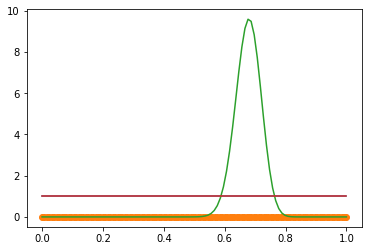

In [35]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Nombre de patients dans chaque groupe
n1 = 125
n2 = 200

# Nombre de patients ayant connu un soulagement de la douleur dans chaque groupe
y1 = 85
y2 = 90

# Prior Beta pour le groupe de traitement
alpha1 = 1
beta1 = 1
prior1 = stats.beta(alpha1, beta1)

# Prior Beta pour le groupe de placebo
alpha2 = 1
beta2 = 1
prior2 = stats.beta(alpha2, beta2)

# Vraisemblance Beta pour le groupe de traitement
likelihood1 = stats.binom(n1, y1/n1).pmf

# Vraisemblance Beta pour le groupe de placebo
likelihood2 = stats.binom(n2, y2/n2).pmf

# Posterior Beta pour le groupe de traitement
posterior1 = stats.beta(alpha1 + y1, beta1 + n1 - y1)

# Posterior Beta pour le groupe de placebo
posterior2 = stats.beta(alpha2 + y2, beta2 + n2 - y2)

# Calcul du RD
rd = posterior1.mean() - posterior2.mean()

# Posterior pour la différence entre les deux groupes
posterior_diff = stats.beta(posterior1.args[0] - posterior2.args[0],
                             posterior1.args[1] - posterior2.args[1])

# Calcul de la moyenne du posterior pour la différence entre les deux groupes (la différence moyenne entre les deux groupes)
mean_diff = posterior_diff.mean()


# Création d'un vecteur pour les probabilités de soulagement de la douleur
x = np.linspace(0, 1, 100)

# Tracé du prior, de la vraisemblance et du posterior pour le groupe de traitement
# Tracé du prior, de la vraisemblance et du posterior pour le groupe de traitement
plt.plot(x, prior1.pdf(x), label='Prior')
x_new = np.linspace(0, 1, len(likelihood1(np.arange(n1+1)/n1)))
plt.plot(x_new, likelihood1(np.arange(n1+1)/n1), 'o', label='Likelihood')

plt.plot(x, posterior1.pdf(x), label='Posterior')


# Tracé du prior, de la vraisemblance et du posterior pour le groupe de placebo
plt.plot(x, prior2.pdf(x), label='Prior')
plt.plot(x, likelihood2(np.arange(n2+1)/n2).max(axis=0), 'o', label='Likelihood')
plt.plot(x, posterior2.pdf(x), label='Posterior')

# Tracé du posterior pour le RD
# Tracé du posterior pour la différence entre les deux groupes
plt.plot(x, posterior_diff.pdf(x), label='Posterior Difference')
plt.axvline(x=mean_diff, linestyle='--', color='k', label='Mean Difference')



plt.legend()
plt.show()
